# Final Project Submission

Please fill out:
* Student name: Myrna Grace Calip
* Student pace: Part Time
* Scheduled project review date/time: 11/3/21
* Instructor name: Claude Fried
* Blog post URL:


* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Overview of Data

In [2]:
house_data = pd.read_csv('data/kc_house_data.csv')
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
house_data.info()
house_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

(21597, 21)

In [4]:
# columns to take a closer look at
# look at the unique values for price
house_data.price.unique()[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [5]:
# sanity check missing values
house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning & Exploring

Plan 
- Set the columns(waterfront, view, yr_renovated) with missing values to '0'
- Replace column dtypes for necessary columns


In [7]:
# check the value counts for each column.
for value in house_data.columns:
    print(value) # column name
    print(house_data[value].value_counts(ascending=False)) # distribution of frequently occuring values
    print('                               ')

id
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
                               
date
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/3/2014       1
1/31/2015      1
5/17/2014      1
5/15/2015      1
5/27/2015      1
Name: date, Length: 372, dtype: int64
                               
price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
                               
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
                               
bathrooms
2.50    5377
1.00    38

In [8]:
# Fill missing values and fix the dtypes
# need to drop the bedroom outlier
# is sqft_above & sqft_basement = sqft_living?

# change missing values to the median 0
house_data['waterfront'].fillna(0, inplace=True)
# convert from float to int
house_data['waterfront'] = house_data['waterfront'].astype('int64')

# change missing values to the median 0
house_data['view'].fillna(0, inplace=True)
# convert from float to int
house_data['view'] = house_data['view'].astype('int64')

# change missing values to the median 0
house_data['yr_renovated'].fillna(0, inplace=True)
# convert from float to int
house_data['yr_renovated'] = house_data['yr_renovated'].astype('int64')

# replace '?' values to the median and then converting from float to int
house_data['sqft_basement'] = house_data['sqft_basement'].replace(to_replace='?',value=0)
house_data['sqft_basement'] = pd.to_numeric(house_data['sqft_basement'])
house_data['sqft_basement'] = house_data['sqft_basement'].astype('int64')

# convert zipcode to string
house_data['zipcode'] = house_data['zipcode'].astype(str)

# double check data summary 
house_data.info()
house_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  object 
 17  lat            21597 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# id has multiple counts that means there are duplicate housing info on here
# is it safe to drop the duplicated data? check the %
# house_data.duplicated('id').value_counts()

In [10]:
# checking the percentage of duplicated data for 'id'
# its best to get rid of this column 
# house_data.duplicated('id').mean()

In [11]:
# everything looks the same except the date and price
# the same houses were sold twice
# lets keep the latest house sold
# visually compare?
# house_data[house_data.duplicated(subset=['id'], keep=False)]

In [12]:
# is sqft_above & sqft_basement = sqft_living?
# how to check properly?
# possibly drop one of them?

above_basement_sum = house_data['sqft_above'] + house_data['sqft_basement']
above_basement_sum

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Length: 21597, dtype: int64

In [13]:
house_data['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

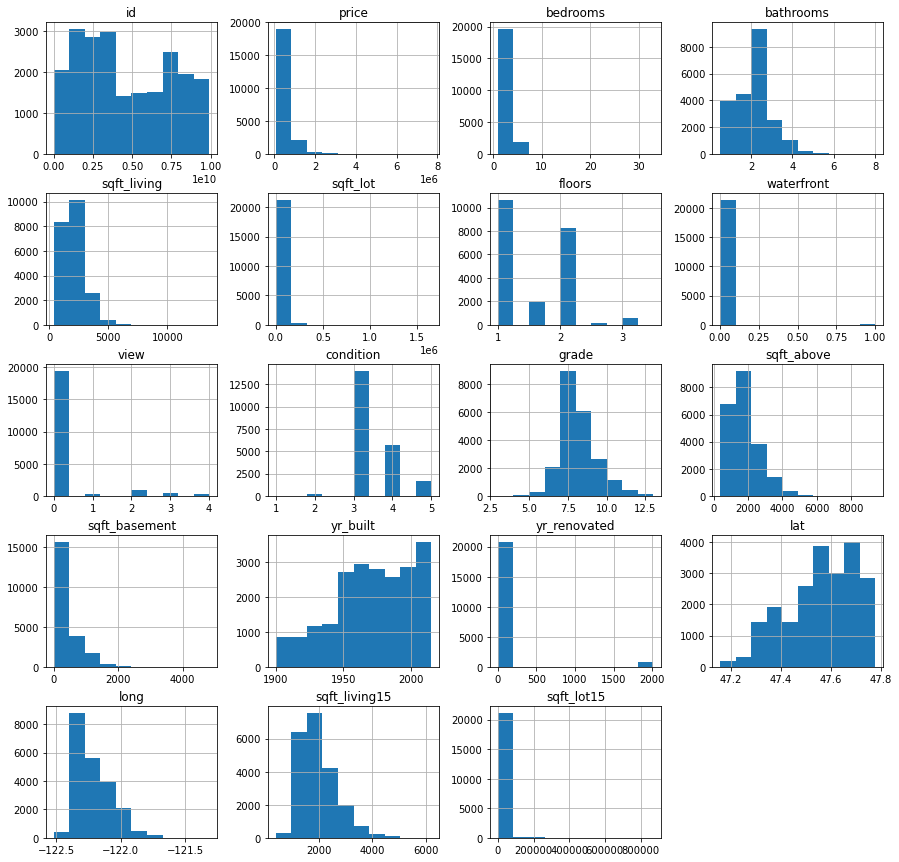

In [14]:
# For all the variables, check distribution by creating a histogram
house_data.hist(figsize=(15,15));

- Majority of the the variables are either left or right skewed. It looks like grades is some what normally distributed

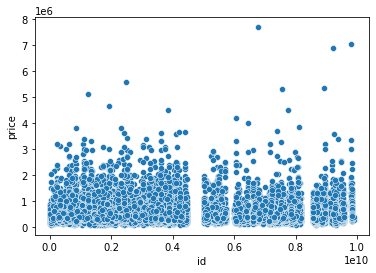

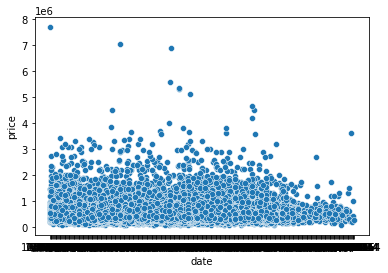

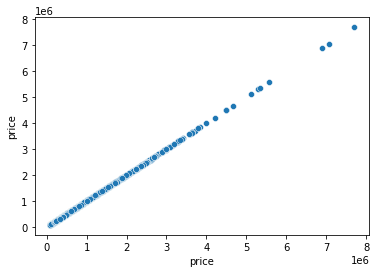

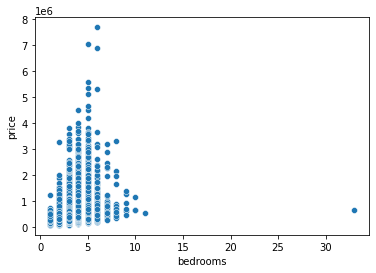

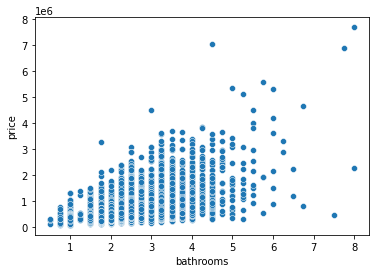

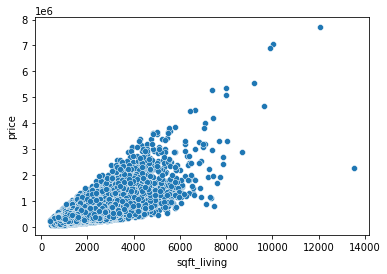

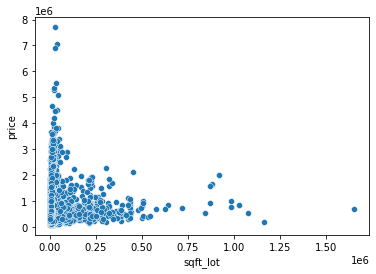

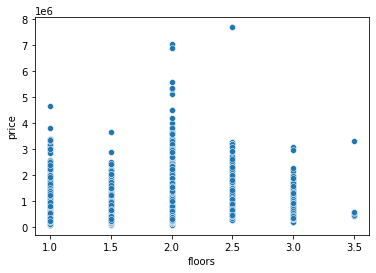

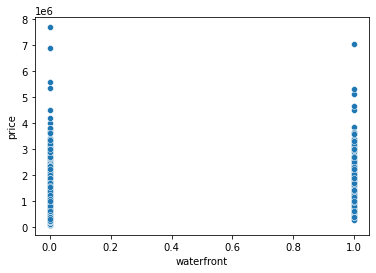

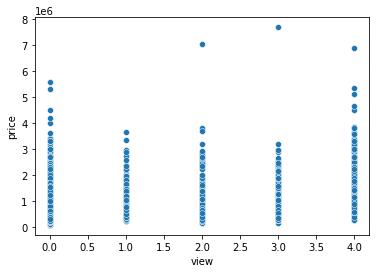

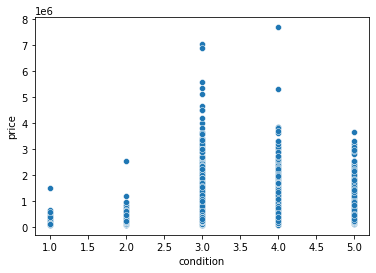

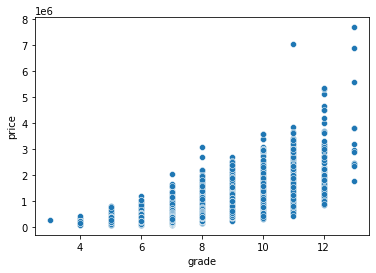

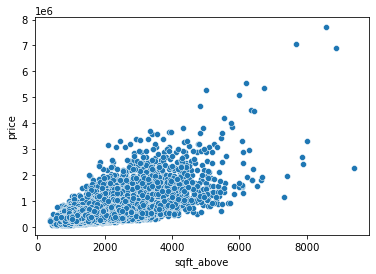

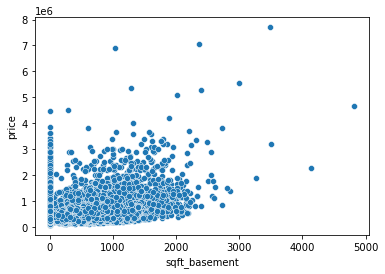

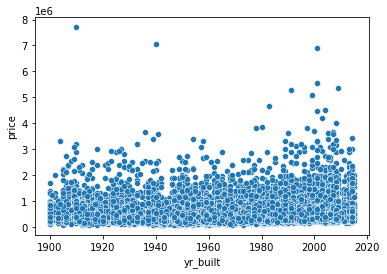

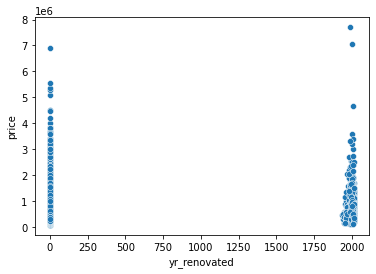

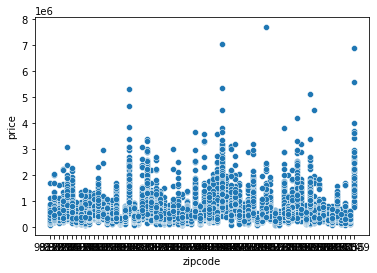

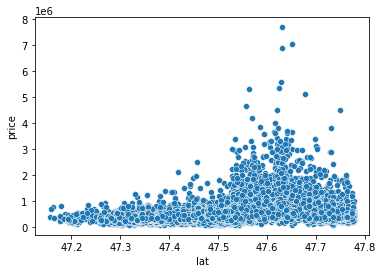

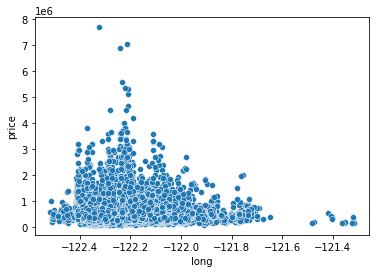

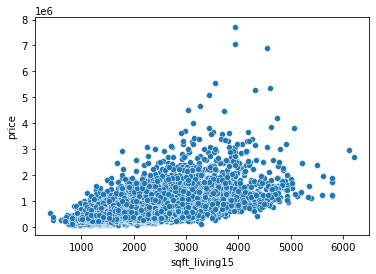

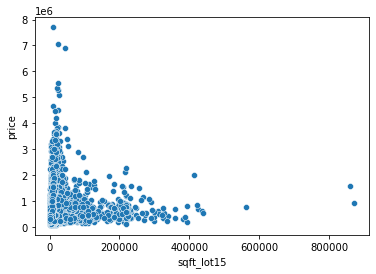

In [15]:
# taking a closer look at our features to closer identify which columns are categorical or numerical
# look at the relationship between the independent & dependent variables
# look out for possible outliers to remove
cols_to_use = ['price', 'bedrooms', 'sqft_living', 
               'sqft_lot', 'floors', 'waterfront', 
               'condition', 'grade', 'sqft_above',
              'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for x in house_data.columns:
    sns.scatterplot(x=x, y='price', data=house_data)
    plt.show()

What can we make of this?

Bathrooms, sqft_living, grade, sqft_above, sqft_basement, sqft_living have a linear correlation to price.


<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

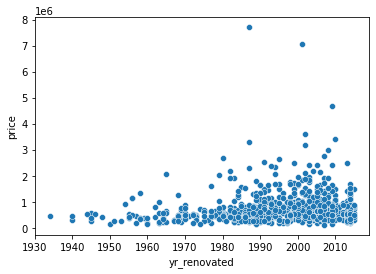

In [16]:
# taking a closer look of the yr_renovated to price 
yr = house_data[house_data['yr_renovated'] != 0]
sns.scatterplot(x='yr_renovated', y='price', data=yr)

Looking at the scatterplots between the features will help us determine the numerical and categorical variables in regards to price. The scatter plots that show vertical line structrue will be our catergorical variables while the graphs with a cloud structure will be our numerical variables.

C:\Users\myrna\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


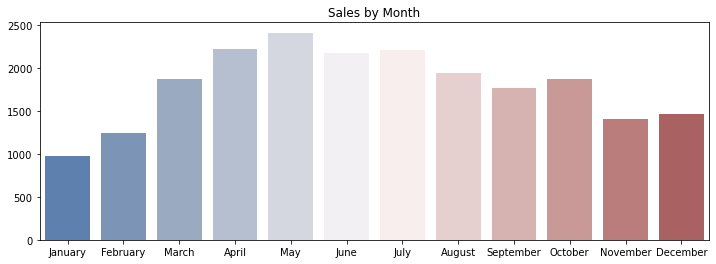

In [17]:
# plotting the housing data by months sold
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []
house_data['date'] = pd.to_datetime(house_data['date'])

for i in range(1,13):
    monthly_sales.append(sum(house_data.date.dt.month == i))
    
plt.figure(figsize=(12,4))
norm = plt.Normalize(0,max(monthly_sales))
colors = plt.cm.Blues(norm(monthly_sales))

sns.barplot(months, monthly_sales, palette="vlag")
plt.title('Sales by Month')
plt.show()

The housing market seems to be a lot more active in the summer than the winter months. We'll check back on this.

### Create New Features

In [18]:
def adding_columns(house_data0):
    house_data['has_renovated'] = house_data.yr_renovated.map(lambda x: 1 if x > 0 else 0)
    house_data['month_sold'] = pd.to_datetime(house_data['date']).dt.month
    house_data['house_age'] = 2021 - house_data['yr_built']
    house_data['price_per_sqft'] =  house_data['price'] / house_data['sqft_living'] + house_data['sqft_lot']
    house_data['has_basement'] = house_data.sqft_basement.map(lambda x: 1 if x > 0 else 0)
adding_columns(house_data)

In [19]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21597 non-null  int64         
 1   date            21597 non-null  datetime64[ns]
 2   price           21597 non-null  float64       
 3   bedrooms        21597 non-null  int64         
 4   bathrooms       21597 non-null  float64       
 5   sqft_living     21597 non-null  int64         
 6   sqft_lot        21597 non-null  int64         
 7   floors          21597 non-null  float64       
 8   waterfront      21597 non-null  int64         
 9   view            21597 non-null  int64         
 10  condition       21597 non-null  int64         
 11  grade           21597 non-null  int64         
 12  sqft_above      21597 non-null  int64         
 13  sqft_basement   21597 non-null  int64         
 14  yr_built        21597 non-null  int64         
 15  yr

In [20]:
def dropped_columns(house_data):
    house_data.drop(columns = ['id', 'yr_renovated',
                               'date','yr_built', 
                               'sqft_basement', 'view'], axis=1, inplace=True)                             
dropped_columns(house_data)                                  
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21597 non-null  float64
 1   bedrooms        21597 non-null  int64  
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  int64  
 4   sqft_lot        21597 non-null  int64  
 5   floors          21597 non-null  float64
 6   waterfront      21597 non-null  int64  
 7   condition       21597 non-null  int64  
 8   grade           21597 non-null  int64  
 9   sqft_above      21597 non-null  int64  
 10  zipcode         21597 non-null  object 
 11  lat             21597 non-null  float64
 12  long            21597 non-null  float64
 13  sqft_living15   21597 non-null  int64  
 14  sqft_lot15      21597 non-null  int64  
 15  has_renovated   21597 non-null  int64  
 16  month_sold      21597 non-null  int64  
 17  house_age       21597 non-null 

In [21]:
# convert new features

def convert_to_string(house_data):
    house_data['has_renovated'] = house_data['has_renovated'].astype(str)
    house_data['has_basement'] = house_data['has_basement'].astype(str)
    
convert_to_string(house_data)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21597 non-null  float64
 1   bedrooms        21597 non-null  int64  
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  int64  
 4   sqft_lot        21597 non-null  int64  
 5   floors          21597 non-null  float64
 6   waterfront      21597 non-null  int64  
 7   condition       21597 non-null  int64  
 8   grade           21597 non-null  int64  
 9   sqft_above      21597 non-null  int64  
 10  zipcode         21597 non-null  object 
 11  lat             21597 non-null  float64
 12  long            21597 non-null  float64
 13  sqft_living15   21597 non-null  int64  
 14  sqft_lot15      21597 non-null  int64  
 15  has_renovated   21597 non-null  object 
 16  month_sold      21597 non-null  int64  
 17  house_age       21597 non-null 

In [22]:
def barplot(feature_var):
    data = house_data.groupby(feature_var).median().reset_index().sort_values('price')
    fig, ax = plt.subplots(figsize=(8,8))
    sns.barplot(x=data[feature_var],y=data['price'], data=data, palette='vlag')
    
    ax.set_title(f'Median Price for {feature_var.title()}')
    plt.xlabel(feature_var)
    plt.ylabel('Price in millions')
    ax.set_xticklabels(labels=data[feature_var], rotation=270)

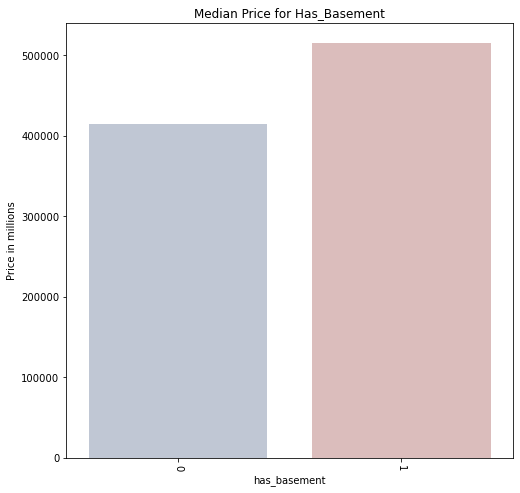

In [23]:
barplot('has_basement')

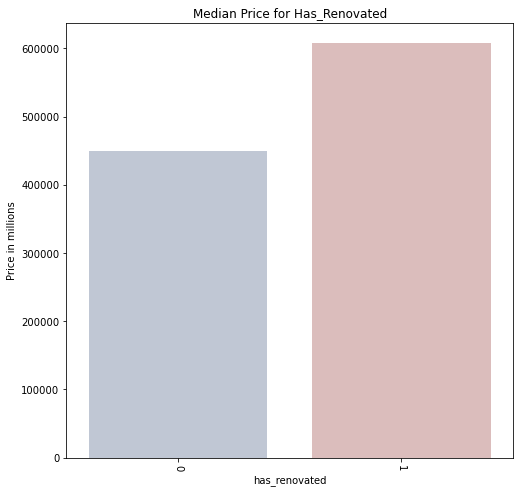

In [24]:
barplot('has_renovated')

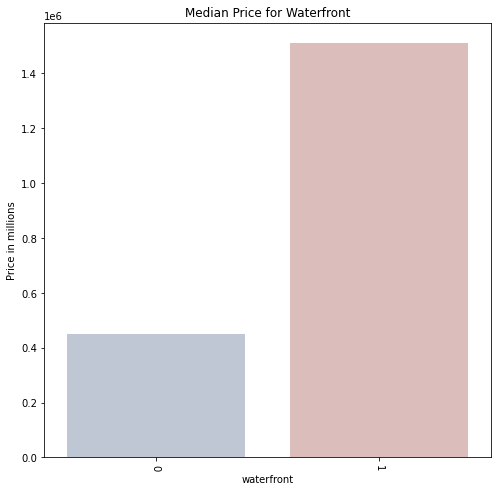

In [25]:
barplot('waterfront')

### Multicollinearity Check

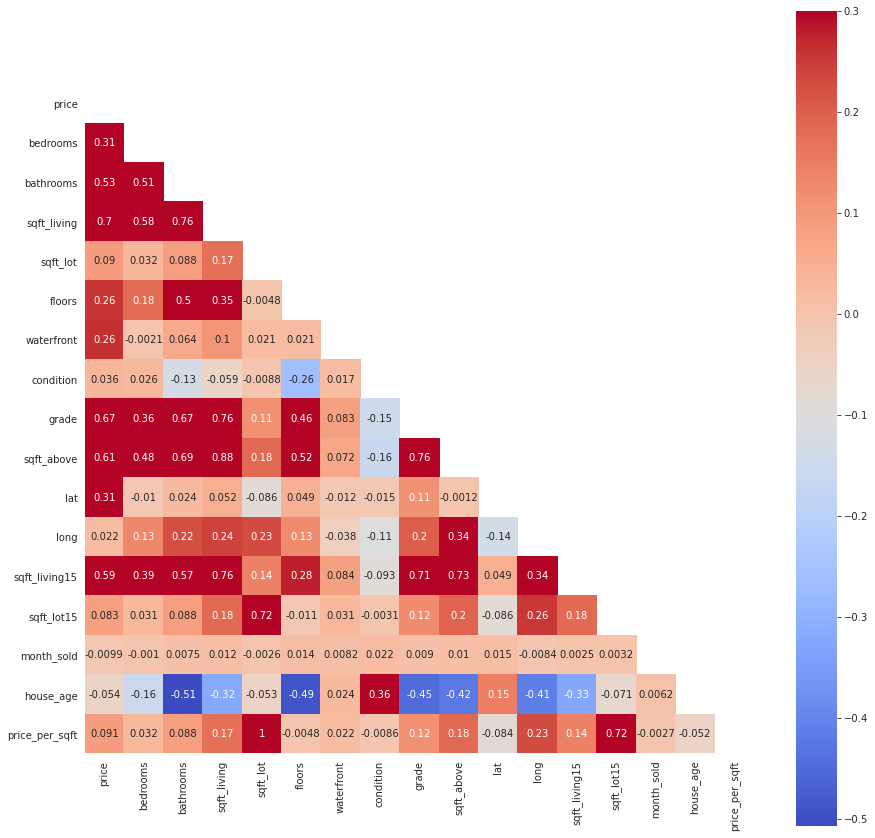

In [26]:
# visualize the correlation between features
# helps understand the multicollinearity 
corr = house_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='coolwarm', annot=True)

- Dark red represents strong positive linear relationships
- Dark blue presents strong negative linear relationships
- r > .75 produces multicollinearity in a model
- Multicollinearity is when there is high correlation between three or more variables

In [27]:
# drop the high multicollinearity variables
house_data.drop(columns = ['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1, inplace=True)
house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,has_renovated,month_sold,house_age,price_per_sqft,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,98178,47.5112,-122.257,0,10,66,5838.050847,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,98125,47.7210,-122.319,1,12,70,7451.338521,1
2,180000.0,2,1.00,770,10000,1.0,0,3,6,98028,47.7379,-122.233,0,2,88,10233.766234,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,98136,47.5208,-122.393,0,12,56,5308.163265,1
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,98074,47.6168,-122.045,0,2,34,8383.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,3,8,98103,47.6993,-122.346,0,5,12,1366.294118,0
21593,400000.0,4,2.50,2310,5813,2.0,0,3,8,98146,47.5107,-122.362,0,2,7,5986.160173,0
21594,402101.0,2,0.75,1020,1350,2.0,0,3,7,98144,47.5944,-122.299,0,6,12,1744.216667,0
21595,400000.0,3,2.50,1600,2388,2.0,0,3,8,98027,47.5345,-122.069,0,1,17,2638.000000,0


In [28]:
house_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'zipcode', 'lat', 'long',
       'has_renovated', 'month_sold', 'house_age', 'price_per_sqft',
       'has_basement'],
      dtype='object')

In [29]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21597 non-null  float64
 1   bedrooms        21597 non-null  int64  
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  int64  
 4   sqft_lot        21597 non-null  int64  
 5   floors          21597 non-null  float64
 6   waterfront      21597 non-null  int64  
 7   condition       21597 non-null  int64  
 8   grade           21597 non-null  int64  
 9   zipcode         21597 non-null  object 
 10  lat             21597 non-null  float64
 11  long            21597 non-null  float64
 12  has_renovated   21597 non-null  object 
 13  month_sold      21597 non-null  int64  
 14  house_age       21597 non-null  int64  
 15  price_per_sqft  21597 non-null  float64
 16  has_basement    21597 non-null  object 
dtypes: float64(6), int64(8), object

### Linearity Check

In [30]:
# # what is messing this up?
# for col in house_data:
#     print(col)
#     sns.lmplot(y='price', x=col, data=house_data)
#     plt.show()

In [31]:
cat_var = ['floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 
            'has_renovated', 'has_basement', 'bedrooms']
num_var = ['bathrooms', 'sqft_living', 'sqft_lot', 'lat', 'long', 'price_per_sqft', 'house_age']

In [32]:
# save
house_data.to_csv(r'./Data/kc_house_data_df.csv', index=False)

### Removing Outliers
- removing outliers using IQR & boxplots

In [33]:
# liad back
# what happened to my zipcode?
house_data = pd.read_csv('./data/kc_house_data_df.csv')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21597 non-null  float64
 1   bedrooms        21597 non-null  int64  
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  int64  
 4   sqft_lot        21597 non-null  int64  
 5   floors          21597 non-null  float64
 6   waterfront      21597 non-null  int64  
 7   condition       21597 non-null  int64  
 8   grade           21597 non-null  int64  
 9   zipcode         21597 non-null  int64  
 10  lat             21597 non-null  float64
 11  long            21597 non-null  float64
 12  has_renovated   21597 non-null  int64  
 13  month_sold      21597 non-null  int64  
 14  house_age       21597 non-null  int64  
 15  price_per_sqft  21597 non-null  float64
 16  has_basement    21597 non-null  int64  
dtypes: float64(6), int64(11)
memory

In [34]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,has_renovated,month_sold,house_age,price_per_sqft,has_basement
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.00000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,98077.951845,47.560093,-122.213982,0.034449,6.573969,50.000324,1.536355e+04,0.38510
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,53.513072,0.138552,0.140724,0.182384,3.115061,29.375234,4.140896e+04,0.48663
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,98001.000000,47.155900,-122.519000,0.000000,1.000000,6.000000,8.092562e+02,0.00000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,98033.000000,47.471100,-122.328000,0.000000,4.000000,24.000000,5.367411e+03,0.00000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,98065.000000,47.571800,-122.231000,0.000000,6.000000,46.000000,7.844800e+03,0.00000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,98118.000000,47.678000,-122.125000,0.000000,9.000000,70.000000,1.092303e+04,1.00000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,98199.000000,47.777600,-121.315000,1.000000,12.000000,121.000000,1.651897e+06,1.00000


In [35]:
# define a function that return box plots of the columns
def plot_boxplot(data, cols):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.boxplot(x=cols, data=data, ax=ax)

In [36]:
# define a function that will return a list of index outliers
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    lst = df.index[(df[col] < lower_bound) |( df[col] > upper_bound)]
    
    return lst

In [37]:
# empty list to store the output indices from multiple rows
index_list = []
for feature in ['price', 'bathrooms', 'bedrooms', 'price_per_sqft']:
    index_list.extend(outliers(house_data, feature))


In [38]:
# define function that will return the cleaned house_data without outliers
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [39]:
house_data_clean = remove(house_data, index_list)

In [40]:
house_data_clean.shape

(17746, 17)

In [41]:
def barplot_clean(feature_clean):
    data = house_data_clean.groupby(feature_clean).median().reset_index().sort_values('price')
    fig, ax = plt.subplots(figsize=(8,8))
    sns.barplot(x=data[feature_clean],y=data['price'], data=data, palette='vlag')
    
    ax.set_title(f'Median Price for {feature_clean.title()}')
    plt.xlabel(feature_clean)
    plt.ylabel('Price in millions')
    ax.set_xticklabels(labels=data[feature_clean], rotation=270)

In [42]:
# % of data we'll be using
(17746/21597) * 100

82.16881974348289

In [43]:
# save just in case
house_data_clean.to_csv(r'./Data/kc_house_data_df.csv', index=False)

#### Price

(162500.0, 1129500.0)

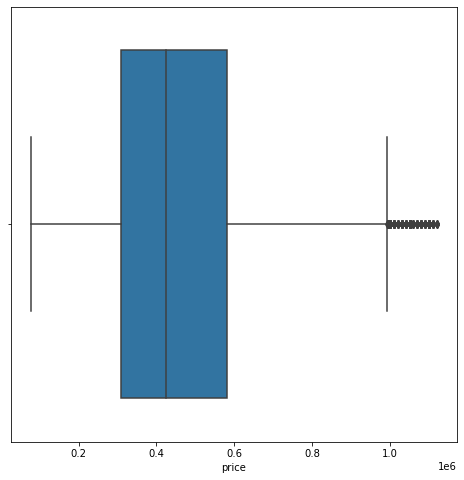

In [44]:
plot_boxplot(house_data_clean, 'price')
Q1 = house_data['price'].quantile(0.25)
Q3 = house_data['price'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

abs(lower_bound),upper_bound
# range we're setting the price to

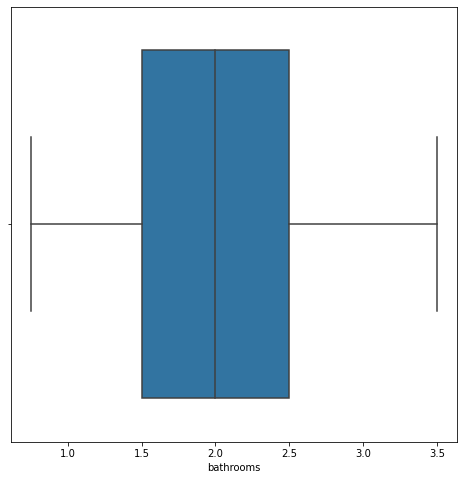

In [45]:
plot_boxplot(house_data_clean, 'bathrooms')

#### Bedrooms

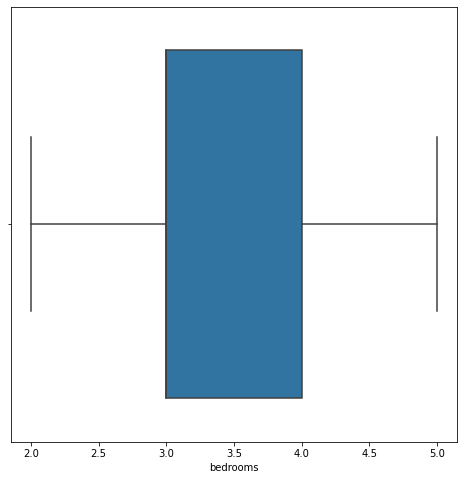

In [46]:
plot_boxplot(house_data_clean, 'bedrooms')

#### price_per_sqft

(2966.011675824174, 19256.44803113553)

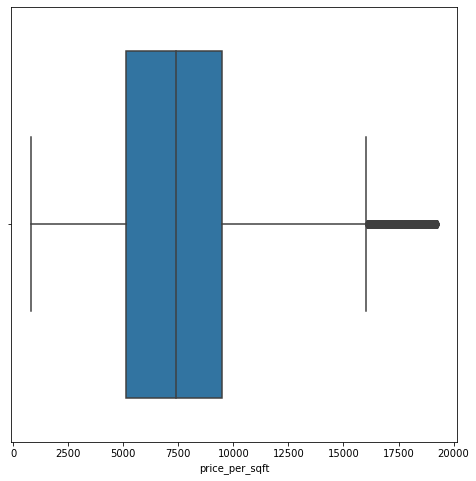

In [47]:
plot_boxplot(house_data_clean, 'price_per_sqft')
Q1 = house_data['price_per_sqft'].quantile(0.25)
Q3 = house_data['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

abs(lower_bound),upper_bound

#### Grade

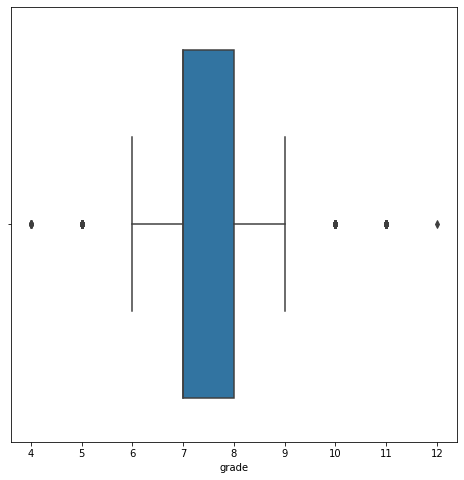

In [48]:
plot_boxplot(house_data_clean, 'grade')

In [49]:
# save just in case
house_data_clean.to_csv(r'./Data/kc_house_data_df.csv', index=False)

In [50]:
# loading back
house_data_clean = pd.read_csv('./data/kc_house_data_df.csv')
house_data_clean.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'zipcode', 'lat', 'long',
       'has_renovated', 'month_sold', 'house_age', 'price_per_sqft',
       'has_basement'],
      dtype='object')

In [51]:
# how did zipcodes turn to int?
house_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17746 entries, 0 to 17745
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           17746 non-null  float64
 1   bedrooms        17746 non-null  int64  
 2   bathrooms       17746 non-null  float64
 3   sqft_living     17746 non-null  int64  
 4   sqft_lot        17746 non-null  int64  
 5   floors          17746 non-null  float64
 6   waterfront      17746 non-null  int64  
 7   condition       17746 non-null  int64  
 8   grade           17746 non-null  int64  
 9   zipcode         17746 non-null  int64  
 10  lat             17746 non-null  float64
 11  long            17746 non-null  float64
 12  has_renovated   17746 non-null  int64  
 13  month_sold      17746 non-null  int64  
 14  house_age       17746 non-null  int64  
 15  price_per_sqft  17746 non-null  float64
 16  has_basement    17746 non-null  int64  
dtypes: float64(6), int64(11)
memory

In [52]:
house_data_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,has_renovated,month_sold,house_age,price_per_sqft,has_basement
count,1.774600e+04,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000
mean,4.642381e+05,3.289079,2.008974,1896.058830,7259.769751,1.474220,0.001352,3.410177,7.470754,98081.053026,47.559425,-122.226356,0.028457,6.570720,50.545757,7516.397281,0.374451
std,2.014612e+05,0.786653,0.665454,698.783997,3533.317118,0.543174,0.036751,0.647483,0.961511,53.966771,0.138763,0.133837,0.166279,3.121344,29.700763,3508.500477,0.483994
min,7.800000e+04,2.000000,0.750000,440.000000,520.000000,1.000000,0.000000,1.000000,4.000000,98001.000000,47.155900,-122.512000,0.000000,1.000000,6.000000,809.256198,0.000000
25%,3.090000e+05,3.000000,1.500000,1370.000000,4823.500000,1.000000,0.000000,3.000000,7.000000,98033.000000,47.470425,-122.336000,0.000000,4.000000,23.000000,5125.736542,0.000000
50%,4.250000e+05,3.000000,2.000000,1800.000000,7200.000000,1.000000,0.000000,3.000000,7.000000,98074.000000,47.569000,-122.263000,0.000000,6.000000,49.000000,7387.802611,0.000000
75%,5.825000e+05,4.000000,2.500000,2320.000000,9253.000000,2.000000,0.000000,4.000000,8.000000,98118.000000,47.680300,-122.149000,0.000000,9.000000,70.000000,9492.334521,1.000000
max,1.120000e+06,5.000000,3.500000,7350.000000,19116.000000,3.500000,1.000000,5.000000,12.000000,98199.000000,47.777600,-121.319000,1.000000,12.000000,121.000000,19239.776786,1.000000


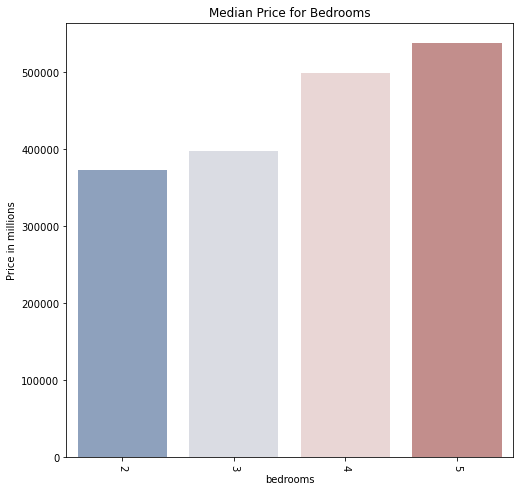

In [53]:
barplot_clean('bedrooms')

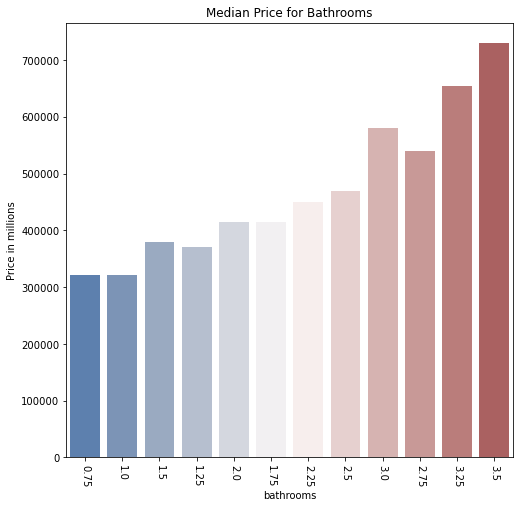

In [54]:
barplot_clean('bathrooms')

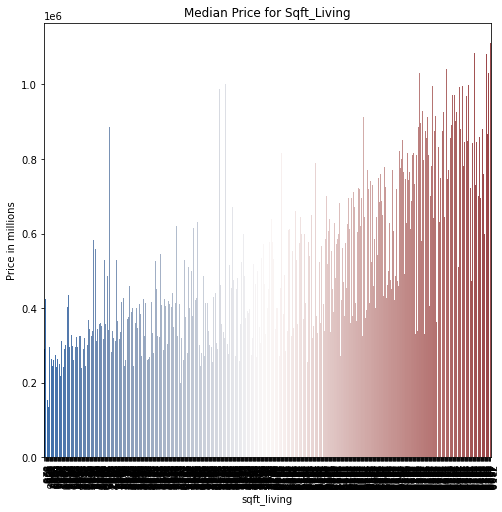

In [55]:
barplot_clean('sqft_living')

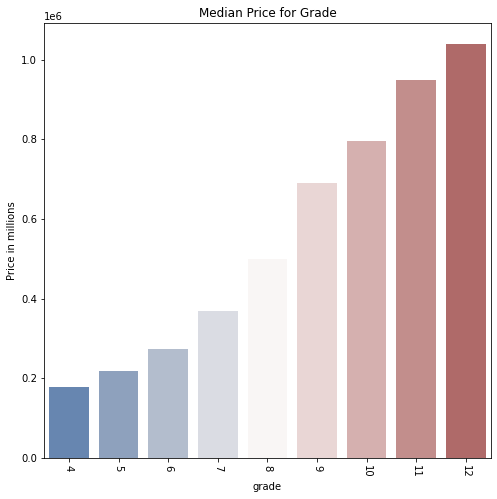

In [56]:
barplot_clean('grade')

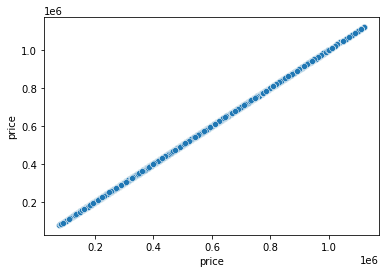

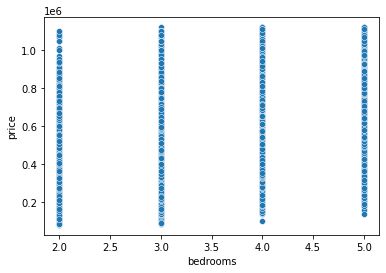

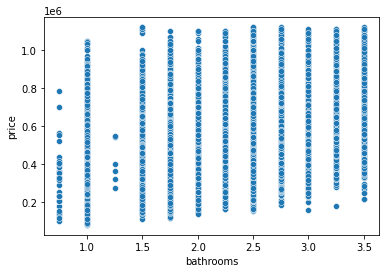

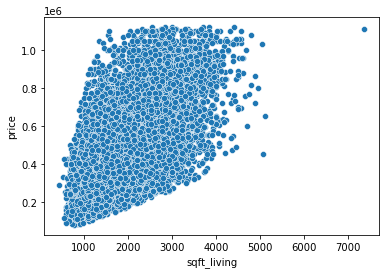

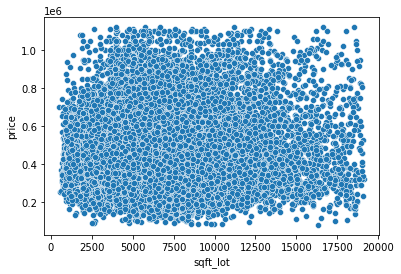

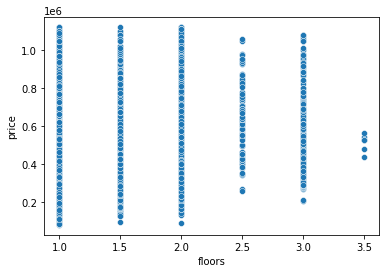

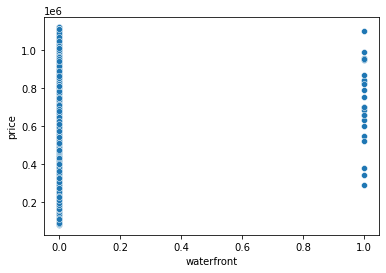

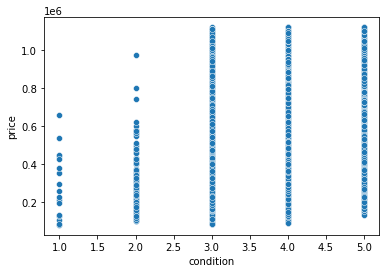

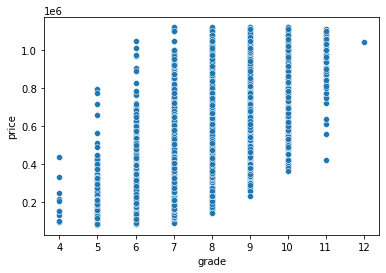

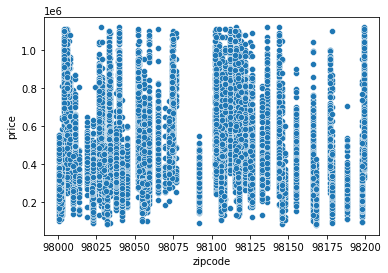

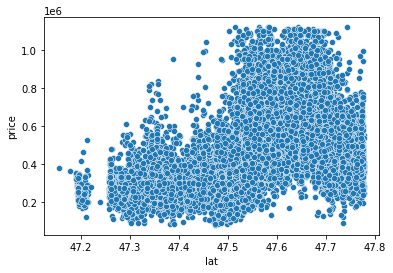

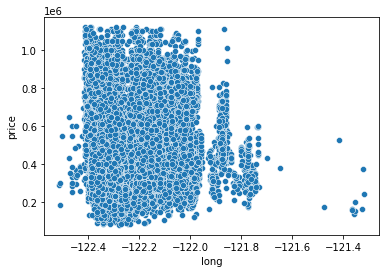

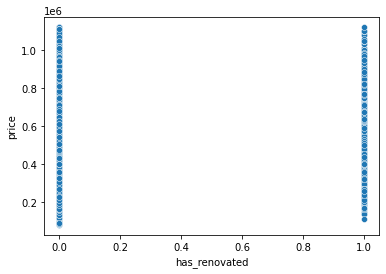

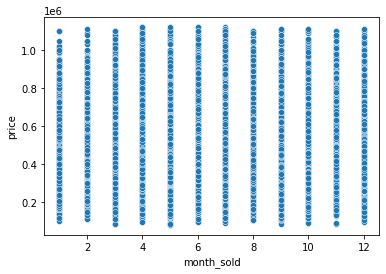

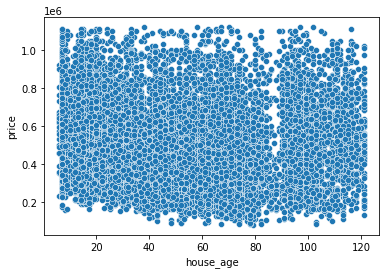

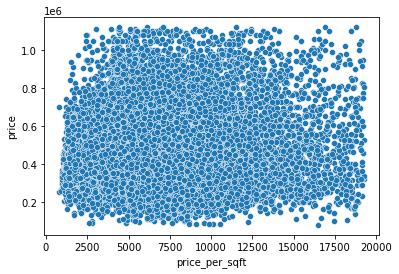

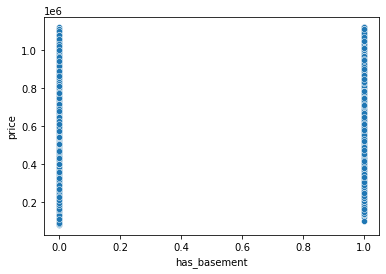

In [57]:
# relook at the scatterplots when the outliers are removed
for x_cleaned in house_data_clean.columns:
    sns.scatterplot(x=x_cleaned, y='price', data=house_data_clean)
    plt.show()

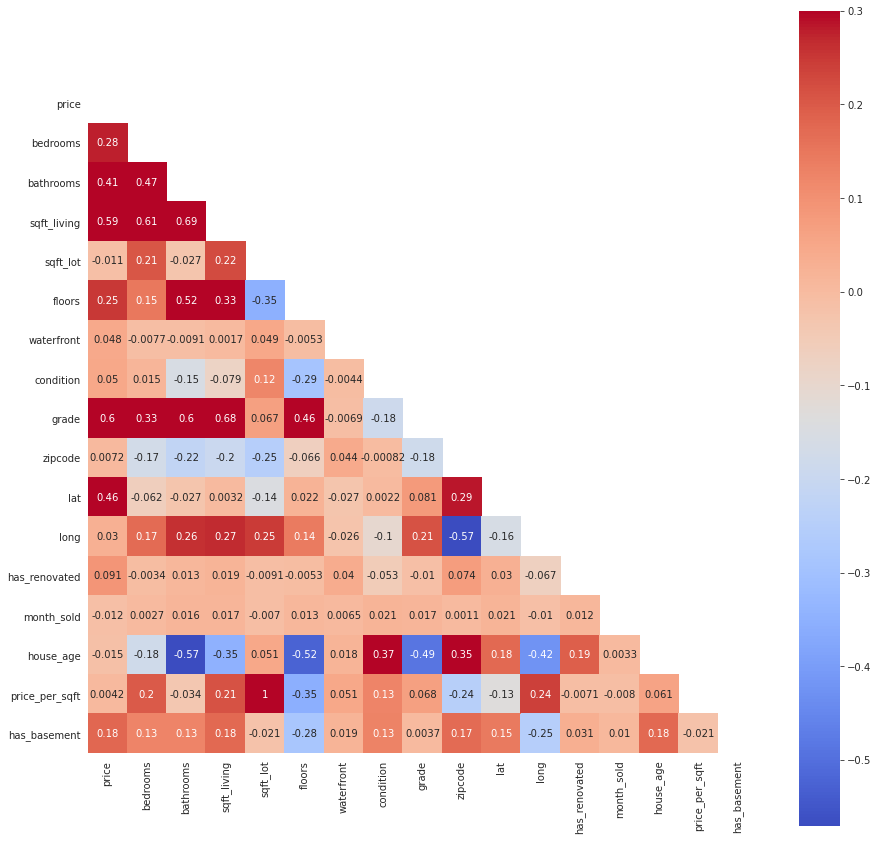

In [58]:
# visualize the Multicollinarity cleaned data
corr = house_data_clean.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='coolwarm', annot=True)

### Looking at Lat & Long Coordinates"

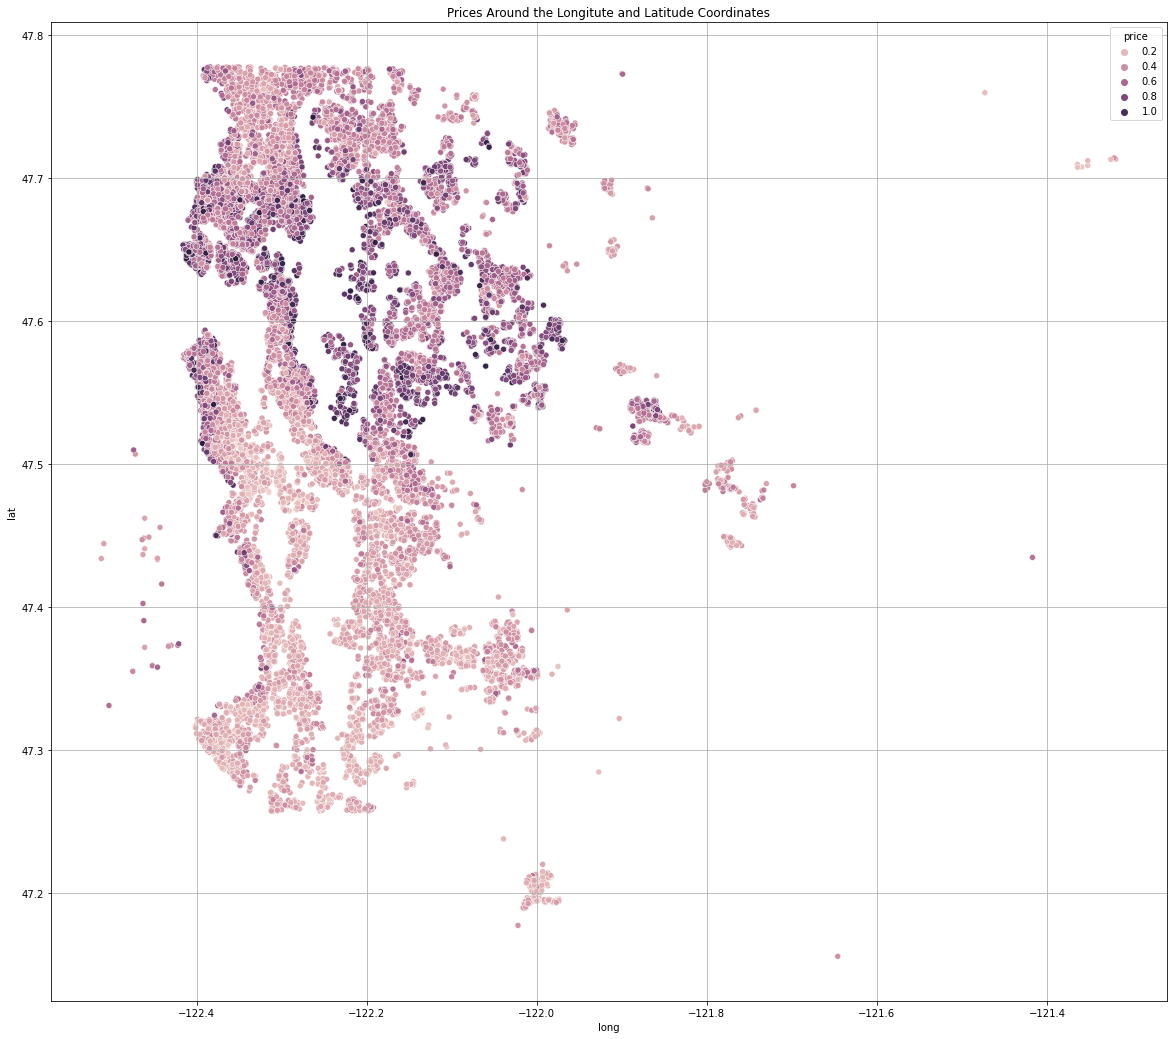

In [59]:
# plot the long and lat coordinates by price
plt.figure(figsize=(20,18))
sns.scatterplot(x = 'long', y = 'lat', data=house_data_clean, hue = 'price')
plt.title("Prices Around the Longitute and Latitude Coordinates")
plt.xlabel("long")
plt.ylabel("lat")
plt.grid()
plt.show()


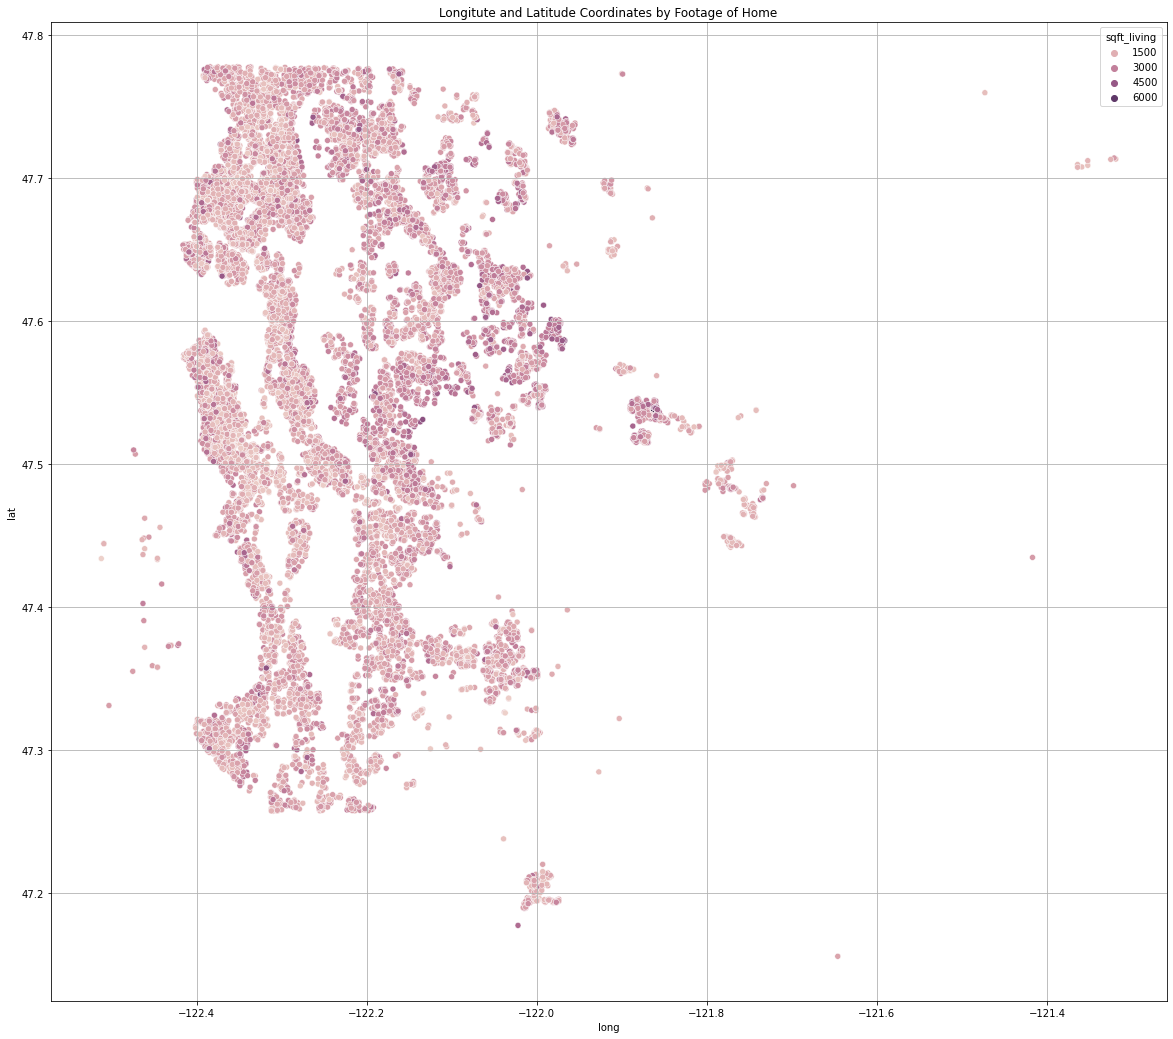

In [60]:
plt.figure(figsize=(20,18))
sns.scatterplot(x = 'long', y = 'lat', data=house_data_clean, hue = 'sqft_living')
plt.title("Longitute and Latitude Coordinates by Footage of Home")
plt.xlabel("long")
plt.ylabel("lat")
plt.grid()
plt.show()


In [61]:
# used for method 2 modeling ols
# TARGET = 'price'
# X_VALS = [x_col for x_col in house_data.columns if x_col != TARGET]
# target_var in X_VALS
# X_VALS

# Baseline Linear Regression Model

Lets build a linear regression model with all the variables to see how it affects the price individually. Some variables to look out for is our R^2, p-values, and the coefficients. 

Keep in mind: 
- R^2 explains how 'accurate' our regression model is and it is a good predictor for the dependent variable. % of variance we can explain by the model
- p-values explains how statstically significant the variables are (smaller the p-value the more statistically significant they are)
- coefficient - explains whether the price goes up or down

In [62]:
house_data_model1 = house_data_clean.copy()

In [63]:
outcome = 'price'
predictors = house_data_model1.drop(columns = ['price', 'zipcode'], axis=1) 
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [64]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+lat+long+has_renovated+month_sold+house_age+price_per_sqft+has_basement'

In [65]:
model_test = ols(formula=formula, data=house_data_model1).fit()
model_test.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.916      
Dependent Variable:     price                AIC:                    439942.4919
Date:                   2021-11-04 12:05     BIC:                    440067.0345
No. Observations:       17746                Log-Likelihood:         -2.1996e+05
Df Model:               15                   F-statistic:            1.287e+04  
Df Residuals:           17730                Prob (F-statistic):     0.00       
R-squared:              0.916                Scale:                  3.4179e+09 
--------------------------------------------------------------------------------
                 Coef.      Std.Err.      t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept      38846.7231 512887.1608    0.0757 0.9396 -966462.2690 1044155.7152
bedrooms        5084.1029    731.3399    6.9518 0.0000    3650.6051    6517.6007
bathrooms      12122.6832   1150.4275   10.5375 0.0000    9867.7328   14377.6336
sqft_living      199.0199      1.2528  158.8592 0.0000     196.5643     201.4756
sqft_lot       -1413.6193      6.2973 -224.4787 0.0000   -1425.9627   -1401.2759
floors          8605.2132   1245.1944    6.9107 0.0000    6164.5105   11045.9159
waterfront     43566.8056  12055.4754    3.6139 0.0003   19936.8948   67196.7163
condition      11306.2508    755.7033   14.9612 0.0000    9824.9984   12787.5032
grade          25004.2516    764.0271   32.7269 0.0000   23506.6838   26501.8194
lat            93832.4244   3875.6375   24.2108 0.0000   86235.7960  101429.0528
long           41619.4888   3947.8050   10.5424 0.0000   33881.4050   49357.5726
has_renovated  19614.0973   2765.9656    7.0912 0.0000   14192.5342   25035.6605
month_sold      -265.9267    141.0700   -1.8851 0.0594    -542.4377      10.5843
house_age        407.0959     24.5130   16.6073 0.0000     359.0479     455.1439
price_per_sqft  1414.3157      6.3197  223.7931 0.0000    1401.9283    1426.7030
has_basement   15613.1909   1109.1382   14.0769 0.0000   13439.1716   17787.2103
--------------------------------------------------------------------------------
Omnibus:                  2530.783          Durbin-Watson:             1.975    
Prob(Omnibus):            0.000             Jarque-Bera (JB):          10346.148
Skew:                     -0.662            Prob(JB):                  0.000    
Kurtosis:                 6.498             Condition No.:             13688087 
================================================================================
* The condition number is large (1e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""

Analysis on Model - as the independent variable goes up by one the independent variable's rises or lowers in price.

### Checking for Normality

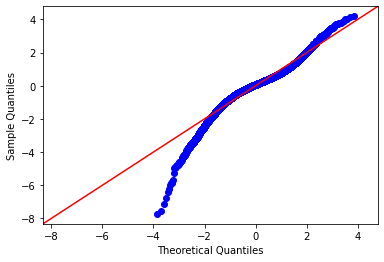

In [66]:
# use a qqplot to check for normality

fig = sm.graphics.qqplot(model_test.resid, dist=stats.norm, line='45', fit=True)

QQ plot used for residuals and to check for normality. FINALLLY!!!!!!!!!!!

In [67]:
# Check for Homoscedasticity
# plt.scatter(model_1.predict(df[x_cols]), model_1.resid)
# plt.plot(model_1.predict(df[x_cols]), [0 for i in range(len(df))])

In [68]:
# TARGET = 'price'
# FEATURES = [x_col for x_col in house_data0.columns if x_col != TARGET]
# TARGET in FEATURES
# FEATURES

# Categorical Variables

Ordinal variables to look out for 
- bedroom
- bathrooms
- floors
- waterfront
- condition
- grade
- has_renovated
- zipcode
- months_sold
- year_sold
- house_age

## Model #2

In [69]:
house_data_model2 = house_data_clean.copy()
house_data_model2 = house_data_model2.drop(columns=['lat', 'long'], axis = 1) # if time persists, we'll work on this
house_data_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17746 entries, 0 to 17745
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           17746 non-null  float64
 1   bedrooms        17746 non-null  int64  
 2   bathrooms       17746 non-null  float64
 3   sqft_living     17746 non-null  int64  
 4   sqft_lot        17746 non-null  int64  
 5   floors          17746 non-null  float64
 6   waterfront      17746 non-null  int64  
 7   condition       17746 non-null  int64  
 8   grade           17746 non-null  int64  
 9   zipcode         17746 non-null  int64  
 10  has_renovated   17746 non-null  int64  
 11  month_sold      17746 non-null  int64  
 12  house_age       17746 non-null  int64  
 13  price_per_sqft  17746 non-null  float64
 14  has_basement    17746 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


In [70]:
# house_data_model[['bedrooms', 'bathrooms', 
#                  'waterfront', 'condition', 
#                  'grade','has_renovated', 
#                   'zipcode', 'month_sold'
#                   , 'yr_sold', 'has_basement']] = (house_data_model[['bedrooms', 'bathrooms', 
#                                                                           'waterfront', 'condition', 
#                                                                           'grade', 'has_renovated', 
#                                                                           'zipcode', 'month_sold'
#                                                                      , 'yr_sold', 'has_basement']].astype(str))

In [71]:
house_data_model2['zipcode'] = (house_data_model2['zipcode'].astype(str))

In [72]:
house_data_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17746 entries, 0 to 17745
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           17746 non-null  float64
 1   bedrooms        17746 non-null  int64  
 2   bathrooms       17746 non-null  float64
 3   sqft_living     17746 non-null  int64  
 4   sqft_lot        17746 non-null  int64  
 5   floors          17746 non-null  float64
 6   waterfront      17746 non-null  int64  
 7   condition       17746 non-null  int64  
 8   grade           17746 non-null  int64  
 9   zipcode         17746 non-null  object 
 10  has_renovated   17746 non-null  int64  
 11  month_sold      17746 non-null  int64  
 12  house_age       17746 non-null  int64  
 13  price_per_sqft  17746 non-null  float64
 14  has_basement    17746 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


### Test-Train Split

In [73]:
TARGET = 'price'
X_VALS = [x_col for x_col in house_data_model2.columns if x_col != TARGET]
TARGET in X_VALS
X_VALS

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'zipcode',
 'has_renovated',
 'month_sold',
 'house_age',
 'price_per_sqft',
 'has_basement']

In [74]:
house_data_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17746 entries, 0 to 17745
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           17746 non-null  float64
 1   bedrooms        17746 non-null  int64  
 2   bathrooms       17746 non-null  float64
 3   sqft_living     17746 non-null  int64  
 4   sqft_lot        17746 non-null  int64  
 5   floors          17746 non-null  float64
 6   waterfront      17746 non-null  int64  
 7   condition       17746 non-null  int64  
 8   grade           17746 non-null  int64  
 9   zipcode         17746 non-null  object 
 10  has_renovated   17746 non-null  int64  
 11  month_sold      17746 non-null  int64  
 12  house_age       17746 non-null  int64  
 13  price_per_sqft  17746 non-null  float64
 14  has_basement    17746 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [75]:
# Separate independant variables from dependant variable.
X = house_data_model2.drop(columns=[TARGET])
y = house_data_model2[TARGET]
X.shape, y.shape

((17746, 14), (17746,))

In [76]:
# check for MSE and how wrong is our model
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=51)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13309, 14), (4437, 14), (13309,), (4437,))

In [77]:
# Check percentage that the train data is 75% and test data is 25%
16_197/(16_197+5400)

0.749965272954577

In [78]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [79]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('object').columns
num_cols, cat_cols

(Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'condition', 'grade', 'has_renovated', 'month_sold',
        'house_age', 'price_per_sqft', 'has_basement'],
       dtype='object'),
 Index(['zipcode'], dtype='object'))

### OHE - Zipcodes

In [80]:
ohe = OneHotEncoder(drop = 'first', sparse=False)

# Fit and transform the train-data.
X_train_ohe = ohe.fit_transform(X_train[cat_cols])
X_test_ohe = ohe.transform(X_test[cat_cols])

# Get names of features.
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(cat_cols))
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(cat_cols))

In [81]:
X_train_ohe.columns = [c.lower() for c in X_train_ohe]
X_test_ohe.columns = [c.lower() for c in X_test_ohe]

In [82]:
X_train_ohe.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
X_test_ohe.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
X_train_raw = pd.concat([X_train[num_cols], 
                         X_train_ohe], 
                        axis=1)
X_test_raw = pd.concat([X_test[num_cols], 
                        X_test_ohe], 
                       axis=1)

In [85]:
X_train_raw

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,has_renovated,month_sold,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,4,2.50,2610,3277,1.5,0,5,8,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,3.00,3690,9892,2.0,0,3,10,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2.50,3500,10891,2.0,0,3,10,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.50,1460,951,3.0,0,3,8,0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2.75,2080,9600,1.0,0,3,8,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13304,3,2.25,1190,1137,2.0,0,3,7,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13305,3,3.50,1460,1021,2.0,0,3,8,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13306,4,3.25,3720,6765,2.0,0,3,9,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13307,3,1.50,1340,6500,1.0,0,3,7,0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scale the Data

In [86]:
# Scale numeric features.
scaler = StandardScaler()
X_train_num_processed = scaler.fit_transform(X_train[num_cols])
X_test_num_processed = scaler.transform(X_test[num_cols])

# Transform to dataframes.
X_train_num_processed = pd.DataFrame(X_train_num_processed, columns=num_cols)
X_test_num_processed = pd.DataFrame(X_test_num_processed, columns=num_cols)


# Sanity check.
X_train_num_processed.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,has_renovated,month_sold,house_age,price_per_sqft,has_basement
0,0.901967,0.728220,1.013101,-1.131479,0.042664,-0.035763,2.456709,0.539866,-0.170274,0.143628,1.650389,-1.103053,1.290348
1,0.901967,1.479644,2.554970,0.745751,0.964447,-0.035763,-0.632952,2.615576,-0.170274,-0.497938,-0.921113,0.744625,-0.774985
2,0.901967,0.728220,2.283716,1.029250,0.964447,-0.035763,-0.632952,2.615576,-0.170274,0.143628,-0.819607,1.037962,-0.774985
3,0.901967,2.231069,-0.628704,-1.791560,2.808012,-0.035763,-0.632952,0.539866,-0.170274,0.464411,-1.259469,-1.763651,-0.774985
4,0.901967,1.103932,0.256443,0.662886,-0.879118,-0.035763,-0.632952,0.539866,-0.170274,1.747544,-0.278238,0.654102,1.290348


In [87]:
# Combine processed data.
X_train_processed = pd.concat(
    [X_train_num_processed, X_train_ohe], 
    axis=1
    )
X_test_processed = pd.concat(
    [X_test_num_processed, X_test_ohe], 
    axis=1
    )

X_train_processed.shape, X_test_processed.shape

((13309, 82), (4437, 82))

#### Train the Model with Training Data

In [88]:
linreg = LinearRegression()
linreg.fit(X_train_processed, y_train)

LinearRegression()

#### VIF

### Model with EVERYTHING

In [89]:
model2 = sm.OLS(y_train, X_train_processed).fit()
model2.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS              Adj. R-squared (uncentered): 0.979      
Dependent Variable:       price            AIC:                         336334.9948
Date:                     2021-11-04 12:05 BIC:                         336949.6829
No. Observations:         13309            Log-Likelihood:              -1.6809e+05
Df Model:                 82               F-statistic:                 7440.      
Df Residuals:             13227            Prob (F-statistic):          0.00       
R-squared (uncentered):   0.979            Scale:                       5.4957e+09 
-----------------------------------------------------------------------------------
                   Coef.      Std.Err.     t     P>|t|      [0.025        0.975]   
-----------------------------------------------------------------------------------
bedrooms           4191.0176   849.4485   4.9338 0.0000     2525.9767     5856.0586
bathrooms          8881.0632  1124.7360   7.8961 0.0000     6676.4194    11085.7069
sqft_living      124674.2240  1328.6135  93.8378 0.0000   122069.9512   127278.4969
sqft_lot       -3421897.4956 41924.4956 -81.6205 0.0000 -3504075.5169 -3339719.4743
floors            -1306.7571  1051.7599  -1.2424 0.2141    -3368.3572      754.8430
waterfront         4596.4750   660.9058   6.9548 0.0000     3301.0049     5891.9450
condition          8075.4911   736.0904  10.9708 0.0000     6632.6485     9518.3338
grade             21866.5523  1110.8400  19.6847 0.0000    19689.1467    24043.9579
has_renovated      5092.1808   675.3866   7.5397 0.0000     3768.3262     6416.0353
month_sold        -3926.3314   647.3662  -6.0651 0.0000    -5195.2620    -2657.4007
house_age          1128.0094  1158.6803   0.9735 0.3303    -1143.1701     3399.1888
price_per_sqft  3409057.0409 41627.3194  81.8947 0.0000  3327461.5275  3490652.5542
has_basement      -2491.8150   830.1233  -3.0017 0.0027    -4118.9756     -864.6544
zipcode_98002    403801.8736  6481.1657  62.3039 0.0000   391097.8598   416505.8874
zipcode_98003    381421.8133  5497.8970  69.3759 0.0000   370645.1470   392198.4796
zipcode_98004    616245.5270  7746.4691  79.5518 0.0000   601061.3371   631429.7169
zipcode_98005    545144.4949  7981.8092  68.2984 0.0000   529499.0047   560789.9851
zipcode_98006    527421.4138  4791.8701 110.0659 0.0000   518028.6615   536814.1662
zipcode_98007    503500.6092  7895.9231  63.7672 0.0000   488023.4681   518977.7503
zipcode_98008    497092.7641  5436.9434  91.4287 0.0000   486435.5755   507749.9526
zipcode_98010    412692.8934 12449.9191  33.1482 0.0000   388289.2673   437096.5195
zipcode_98011    442093.7207  6671.3062  66.2679 0.0000   429017.0042   455170.4371
zipcode_98014    426350.3088 12321.7160  34.6015 0.0000   402197.9790   450502.6385
zipcode_98019    415657.2294  7236.6023  57.4382 0.0000   401472.4514   429842.0073
zipcode_98022    397324.8281  7196.3506  55.2120 0.0000   383218.9493   411430.7069
zipcode_98023    370907.6076  4214.0080  88.0178 0.0000   362647.5479   379167.6673
zipcode_98024    441310.0169 17057.8236  25.8714 0.0000   407874.2372   474745.7965
zipcode_98027    495950.2672  5360.6203  92.5173 0.0000   485442.6829   506457.8515
zipcode_98028    440014.4598  5451.8036  80.7099 0.0000   429328.1432   450700.7764
zipcode_98029    502321.5399  4901.0407 102.4928 0.0000   492714.7977   511928.2822
zipcode_98030    382428.2154  5656.0861  67.6136 0.0000   371341.4759   393514.9549
zipcode_98031    386614.7298  5404.7855  71.5319 0.0000   376020.5754   397208.8842
zipcode_98032    386286.5861  7905.9252  48.8604 0.0000   370789.8394   401783.3328
zipcode_98033    528566.6395  4712.4584 112.1637 0.0000   519329.5455   537803.7334
zipcode_98034    467235.2686  3884.5043 120.2818 0.0000   459621.0834   474849.4539
zipcode_98038    396832.5279 

In [90]:
# model = sm.OLS(y_train, X_train_scaled).fit()

# # https://stackoverflow.com/a/52976810
# results_as_html = model.summary().tables[1].as_html()
# results = pd.read_html(results_as_html, header=0, index_col=0)[0]
# results.sort_values('coef', ascending=False)

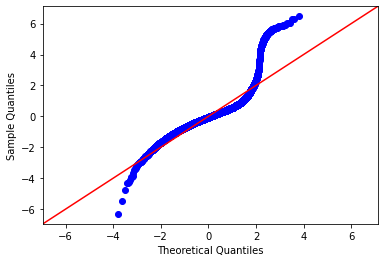

In [91]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

#### MSE

In [92]:
# check for MSE and how wrong is our model
# Get predictions.
y_train_pred = linreg.predict(X_train_processed)
y_test_pred = linreg.predict(X_test_processed)

# Get metrics. Store in a dictionary.
metrics_dct = {}

# Iterate over training and test predictions.
for split, y_pred in [('train', y_train_pred), ('test', y_test_pred)]:
    # Get appropriate y-values to compare to.
    y_true = y_train.copy() if split == 'train' else y_test.copy()
    
    # Get metrics by comparing the true values to the predicted values.
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    split_dct = {
        'mse': mse,
        'mae': mae,
        'rmse': np.sqrt(mse)
    }
    metrics_dct[split] = split_dct
    
# Show results.
metrics_dct

{'train': {'mse': 2933493873.866629,
  'mae': 38625.42855294678,
  'rmse': 54161.738098648835},
 'test': {'mse': 2987468980.8318863,
  'mae': 39271.96722451893,
  'rmse': 54657.7440152069}}

In [93]:
pd.DataFrame(metrics_dct)

,train,test
mse,2.933494e+09,2.987469e+09
mae,3.862543e+04,3.927197e+04
rmse,5.416174e+04,5.465774e+04


### Grades vs. Price

In [94]:
model2 = sm.OLS(y_train, X_train['grade']).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.884      
Dependent Variable:     price            AIC:                         358769.4679
Date:                   2021-11-04 12:05 BIC:                         358776.9641
No. Observations:       13309            Log-Likelihood:              -1.7938e+05
Df Model:               1                F-statistic:                 1.015e+05  
Df Residuals:           13308            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.884            Scale:                       2.9835e+10 
------------------------------------------------------------------------------------
              Coef.       Std.Err.       t        P>|t|       [0.025        0.975]  
------------------------------------------------------------------------------------
grade       63250.1972    198.5301    318.5924    0.0000    62861.0498    63639.3445
---------------------------------------------------------------------------------
Omnibus:                  1141.025           Durbin-Watson:              2.016   
Prob(Omnibus):            0.000              Jarque-Bera (JB):           1454.639
Skew:                     0.801              Prob(JB):                   0.000   
Kurtosis:                 3.236              Condition No.:              1       
=================================================================================

"""

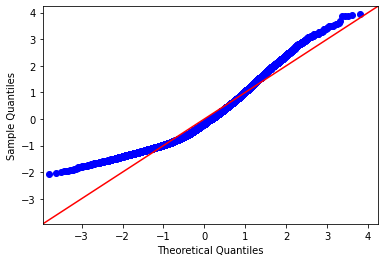

In [95]:
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True);

### Sqft_living vs. Price

In [96]:
model2 = sm.OLS(y_train, X_train['sqft_living']).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.888      
Dependent Variable:     price            AIC:                         358355.7072
Date:                   2021-11-04 12:05 BIC:                         358363.2034
No. Observations:       13309            Log-Likelihood:              -1.7918e+05
Df Model:               1                F-statistic:                 1.051e+05  
Df Residuals:           13308            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.888            Scale:                       2.8922e+10 
------------------------------------------------------------------------------------
                   Coef.      Std.Err.       t        P>|t|      [0.025      0.975] 
------------------------------------------------------------------------------------
sqft_living       235.9914      0.7278    324.2321    0.0000    234.5647    237.4181
---------------------------------------------------------------------------------
Omnibus:                  206.247            Durbin-Watson:               1.987  
Prob(Omnibus):            0.000              Jarque-Bera (JB):            221.966
Skew:                     0.284              Prob(JB):                    0.000  
Kurtosis:                 3.277              Condition No.:               1      
=================================================================================

"""

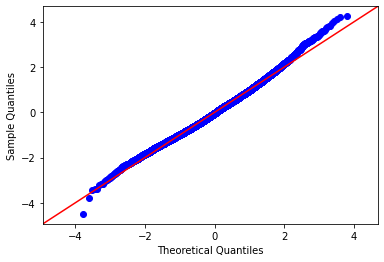

In [97]:
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True);

### Bedrooms vs. Price Model


In [98]:
model2 = sm.OLS(y_train, X_train['bedrooms']).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.842      
Dependent Variable:     price            AIC:                         362874.2939
Date:                   2021-11-04 12:05 BIC:                         362881.7901
No. Observations:       13309            Log-Likelihood:              -1.8144e+05
Df Model:               1                F-statistic:                 7.103e+04  
Df Residuals:           13308            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.842            Scale:                       4.0614e+10 
-----------------------------------------------------------------------------------
                Coef.      Std.Err.      t       P>|t|       [0.025        0.975]  
-----------------------------------------------------------------------------------
bedrooms     137521.9187   515.9974   266.5167   0.0000   136510.4903   138533.3470
---------------------------------------------------------------------------------
Omnibus:                  530.430            Durbin-Watson:               1.999  
Prob(Omnibus):            0.000              Jarque-Bera (JB):            595.954
Skew:                     0.518              Prob(JB):                    0.000  
Kurtosis:                 3.027              Condition No.:               1      
=================================================================================

"""

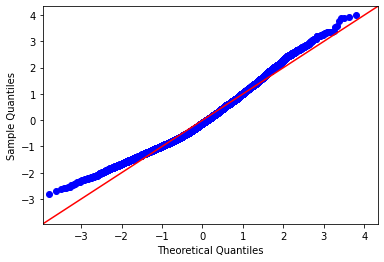

In [99]:
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True);

### Bathrooms vs. Price Model

In [100]:
model2 = sm.OLS(y_train, X_train['bathrooms']).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.851      
Dependent Variable:     price            AIC:                         362118.7090
Date:                   2021-11-04 12:05 BIC:                         362126.2052
No. Observations:       13309            Log-Likelihood:              -1.8106e+05
Df Model:               1                F-statistic:                 7.596e+04  
Df Residuals:           13308            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.851            Scale:                       3.8372e+10 
-----------------------------------------------------------------------------------
                Coef.      Std.Err.      t       P>|t|       [0.025        0.975]  
-----------------------------------------------------------------------------------
bathrooms    220489.3282   800.0209   275.6044   0.0000   218921.1734   222057.4831
---------------------------------------------------------------------------------
Omnibus:                  430.546            Durbin-Watson:               1.990  
Prob(Omnibus):            0.000              Jarque-Bera (JB):            472.914
Skew:                     0.461              Prob(JB):                    0.000  
Kurtosis:                 3.064              Condition No.:               1      
=================================================================================

"""

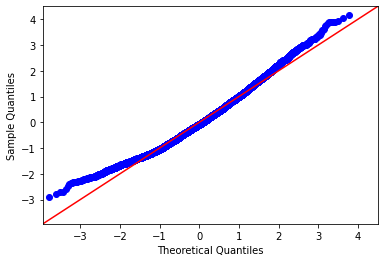

In [101]:
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True);

In [104]:
model2 = sm.OLS(y_train, X_train['price_per_sqft']).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.694      
Dependent Variable:     price            AIC:                         371685.8948
Date:                   2021-11-04 12:12 BIC:                         371693.3910
No. Observations:       13309            Log-Likelihood:              -1.8584e+05
Df Model:               1                F-statistic:                 3.019e+04  
Df Residuals:           13308            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.694            Scale:                       7.8743e+10 
------------------------------------------------------------------------------------
                      Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
------------------------------------------------------------------------------------
price_per_sqft       50.9532      0.2932    173.7593    0.0000    50.3784    51.5280
---------------------------------------------------------------------------------
Omnibus:                    56.144            Durbin-Watson:               1.838 
Prob(Omnibus):              0.000             Jarque-Bera (JB):            47.301
Skew:                       0.085             Prob(JB):                    0.000 
Kurtosis:                   2.762             Condition No.:               1     
=================================================================================

"""

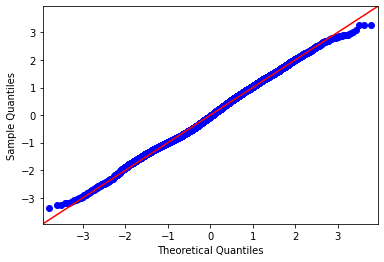

In [105]:
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True);

### Floors vs. Price Model

In [113]:
model2 = sm.OLS(y_train, X_train['floors']).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.802      
Dependent Variable:     price            AIC:                         365906.8464
Date:                   2021-11-04 12:35 BIC:                         365914.3426
No. Observations:       13309            Log-Likelihood:              -1.8295e+05
Df Model:               1                F-statistic:                 5.385e+04  
Df Residuals:           13308            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.802            Scale:                       5.1007e+10 
-----------------------------------------------------------------------------------
               Coef.       Std.Err.      t       P>|t|       [0.025        0.975]  
-----------------------------------------------------------------------------------
floors      288737.7350   1244.3047   232.0475   0.0000   286298.7208   291176.7492
---------------------------------------------------------------------------------
Omnibus:                  145.001            Durbin-Watson:               1.973  
Prob(Omnibus):            0.000              Jarque-Bera (JB):            150.785
Skew:                     0.247              Prob(JB):                    0.000  
Kurtosis:                 3.167              Condition No.:               1      
=================================================================================

"""

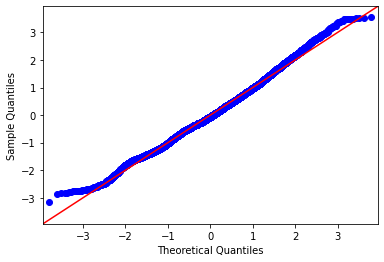

In [114]:
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True);

## Conclusion

## Future Work